# Raster processing with XArray

http://xarray.pydata.org

Robin Wilson &nbsp; &nbsp; &nbsp; @sciremotesense &nbsp; &nbsp; &nbsp; robin@rtwilson.com

**UPDATE THIS**

http://bit.do/xarraytalk &nbsp; &nbsp; &nbsp; https://github.com/robintw/xarraytalk

## Problem

Processing large time series of raster data is **difficult**

**Example**:

We have many decades of daily raster data, and want to get:

- Seasonal means and standard deviations

- Long time-series across specific points

- Individual images at specific times

# HOW?

## `XArray`

The power of `pandas` for multidimension arrays

- Labelled

- Multidimensional

- Efficient

- Easy to use!

## Related tools / Prerequisites?

- `python` (obviously!)
- `numpy`
- `pandas`
- `matplotlib`
- `GDAL`
- `rasterio`

## Previous experience?

**Q:** How many people are experienced with `numpy`?

**Q:** ...with `pandas`?

**Q:** ...with `GDAL`?

In [1]:
import datetime

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import xarray as xr

## Example

In [15]:
PM25 = xr.open_dataarray('/Users/robin/code/MAIACProcessing/All2014.nc')

In [13]:
PM25.shape

(181, 1162, 1240)

In [14]:
PM25.dims

('time', 'y', 'x')

In [6]:
seasonal = PM25.groupby('time.season').mean(dim='time')

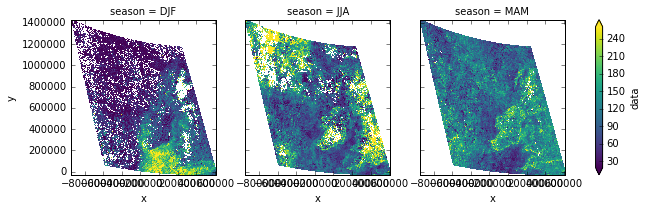

In [7]:
seasonal.plot.imshow(col='season', robust=True)

In [48]:
time_series = PM25.isel(x=1000, y=1100).to_pandas().dropna()

In [49]:
time_series

time
2014-01-07     62.0
2014-01-17    121.0
2014-01-25    127.0
2014-02-10    135.0
2014-02-11    186.0
2014-02-18    237.0
2014-02-25    352.0
2014-02-26    293.0
2014-02-27    260.0
2014-03-01    165.0
2014-03-08    221.0
2014-03-09    221.0
2014-03-10    291.0
2014-03-13    552.0
2014-03-16    156.0
2014-03-21    159.0
2014-03-22    160.0
2014-03-23    163.0
2014-03-25    261.0
2014-03-30    362.0
2014-04-04     19.0
2014-04-09     19.0
2014-04-10     19.0
2014-04-11     19.0
2014-04-13     33.0
2014-04-14     19.0
2014-04-16    159.0
2014-04-18     53.0
2014-04-19    118.0
2014-04-24    194.0
2014-04-25    250.0
2014-05-10    154.0
2014-05-13    181.0
2014-05-14     19.0
2014-05-15    117.0
2014-05-17    239.0
2014-05-22    188.0
2014-06-02    189.0
2014-06-05     71.0
2014-06-07    107.0
2014-06-13    115.0
2014-06-14    324.0
2014-06-15     64.0
2014-06-18    132.0
2014-06-20    101.0
2014-06-21    115.0
2014-06-23    200.0
2014-06-27    162.0
dtype: float32

In [25]:
one_day = PM25.sel(time='2014-02-20')

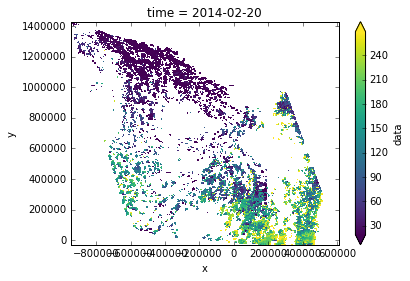

In [26]:
one_day.plot(robust=True)

## Plan

- Introduction to XArray

- Efficient processing with `dask` and `dask.distributed`

- Getting raster data into XArray

- Geographic processing

- Where next...?

## Introduction to XArray

`xarray.DataArray` is a fancy, labelled version of a `numpy.ndarray`

`xarray.Dataset` is a collection of multiple `DataArray`s which share dimensions

In [3]:
arr = np.random.rand(3, 4, 2)

In [50]:
xr.DataArray(arr)

<xarray.DataArray (dim_0: 3, dim_1: 4, dim_2: 2)>
array([[[ 0.71818 ,  0.409806],
        [ 0.320736,  0.852219],
        [ 0.877005,  0.494057],
        [ 0.722172,  0.55322 ]],

       [[ 0.194726,  0.341083],
        [ 0.29444 ,  0.455549],
        [ 0.448583,  0.532099],
        [ 0.237287,  0.675043]],

       [[ 0.916471,  0.47174 ],
        [ 0.858274,  0.960313],
        [ 0.040149,  0.00346 ],
        [ 0.870381,  0.728104]]])
Unindexed dimensions:
    dim_0, dim_1, dim_2

In [5]:
xr.DataArray(arr, dims=('x', 'y', 'time'))

<xarray.DataArray (x: 3, y: 4, time: 2)>
array([[[ 0.71818 ,  0.409806],
        [ 0.320736,  0.852219],
        [ 0.877005,  0.494057],
        [ 0.722172,  0.55322 ]],

       [[ 0.194726,  0.341083],
        [ 0.29444 ,  0.455549],
        [ 0.448583,  0.532099],
        [ 0.237287,  0.675043]],

       [[ 0.916471,  0.47174 ],
        [ 0.858274,  0.960313],
        [ 0.040149,  0.00346 ],
        [ 0.870381,  0.728104]]])
Unindexed dimensions:
    x, y, time

In [6]:
da = xr.DataArray(arr,
                  dims=('x', 'y', 'time'),
                  coords={'x': [10, 20, 30],
                          'y': [0.3, 0.7, 1.3, 1.5],
                          'time': [datetime.datetime(2016, 3, 5),
                                   datetime.datetime(2016, 4, 7)]})

In [7]:
da

<xarray.DataArray (x: 3, y: 4, time: 2)>
array([[[ 0.71818 ,  0.409806],
        [ 0.320736,  0.852219],
        [ 0.877005,  0.494057],
        [ 0.722172,  0.55322 ]],

       [[ 0.194726,  0.341083],
        [ 0.29444 ,  0.455549],
        [ 0.448583,  0.532099],
        [ 0.237287,  0.675043]],

       [[ 0.916471,  0.47174 ],
        [ 0.858274,  0.960313],
        [ 0.040149,  0.00346 ],
        [ 0.870381,  0.728104]]])
Coordinates:
  * x        (x) int64 10 20 30
  * y        (y) float64 0.3 0.7 1.3 1.5
  * time     (time) datetime64[ns] 2016-03-05 2016-04-07

In [8]:
da.sel(time='2016-03-05')

<xarray.DataArray (x: 3, y: 4)>
array([[ 0.71818 ,  0.320736,  0.877005,  0.722172],
       [ 0.194726,  0.29444 ,  0.448583,  0.237287],
       [ 0.916471,  0.858274,  0.040149,  0.870381]])
Coordinates:
  * x        (x) int64 10 20 30
  * y        (y) float64 0.3 0.7 1.3 1.5
    time     datetime64[ns] 2016-03-05

In [9]:
da.isel(time=1)

<xarray.DataArray (x: 3, y: 4)>
array([[ 0.409806,  0.852219,  0.494057,  0.55322 ],
       [ 0.341083,  0.455549,  0.532099,  0.675043],
       [ 0.47174 ,  0.960313,  0.00346 ,  0.728104]])
Coordinates:
  * x        (x) int64 10 20 30
  * y        (y) float64 0.3 0.7 1.3 1.5
    time     datetime64[ns] 2016-04-07

In [10]:
da.sel(x=slice(0, 20))

<xarray.DataArray (x: 2, y: 4, time: 2)>
array([[[ 0.71818 ,  0.409806],
        [ 0.320736,  0.852219],
        [ 0.877005,  0.494057],
        [ 0.722172,  0.55322 ]],

       [[ 0.194726,  0.341083],
        [ 0.29444 ,  0.455549],
        [ 0.448583,  0.532099],
        [ 0.237287,  0.675043]]])
Coordinates:
  * x        (x) int64 10 20
  * y        (y) float64 0.3 0.7 1.3 1.5
  * time     (time) datetime64[ns] 2016-03-05 2016-04-07

In [16]:
da.mean(dim='time')

<xarray.DataArray (x: 3, y: 4)>
array([[ 0.45822651,  0.65144207,  0.07688604,  0.17737525],
       [ 0.41739867,  0.63932211,  0.80195646,  0.70756264],
       [ 0.17584453,  0.74248513,  0.16772333,  0.48272797]])
Coordinates:
  * y        (y) float64 0.3 0.7 1.3 1.5
  * x        (x) int64 10 20 30

In [17]:
da.mean(dim=['x', 'y'])

<xarray.DataArray (time: 2)>
array([ 0.50701227,  0.40947951])
Coordinates:
  * time     (time) datetime64[ns] 2016-03-05 2016-04-07

In [19]:
PM25.sel(time='2014').groupby('time.month').std(dim='time')

## Efficient processing with `dask` and `dask.distributed`

`dask` creates a *computational graph* of your processing steps, and then executes it *as efficiently as possible*.

This includes *only loading data that is actually needed* and *only processing things once*.

## NetCDF
- Data format for multidimensional array data

- Basically the same as a `Dataset`

- Can read in *chunks*

In [55]:
data = xr.open_mfdataset(['DaskTest1.nc', 'DaskTest2.nc'], chunks={'time':10})['data']
avg = data.mean(dim='time')

[Dask execution graph](ExampleGraph_1.png)

In [56]:
seasonal = data.groupby('time.season').mean(dim='time')

[Dask execution graph](ExampleGraph_2.png)

## `dask.distributed`

All of these different *chunks*, and separate processing chains can be run on **separate computers**.

- [Dask Distributed Example](Dask Distributed Example.ipynb)
- [Live Dashboard](http://localhost:8787)

## Getting raster data into `xarray`

## Geographic processing

## Where next...?

- `xarray` is under rapid development
- General approach is stable, some details may change
- Very responsive developers

- Raster I/O will be built-in to `xarray` soon-ish

- `dask` is rapidly improving too

## Resources

- These slides are available online at **TODO**
- The notebooks are available at **TODO**